***ARTIFICIAL NEURAL NETWORKS***

Aim:- To implement a simple end to end neural networks and check whether the student will get the admission or not based on GRE Score, TOEFL Score and CGPA Details.

### Steps required in this process:-

1.  Import all the necessary libraries

2.  Load   the  dataset

3.  Perform the data exploration

4.  Do data preprocessing

5.  Divide the dataset into independent and dependent variables

6.  Divide the independent and dependent variables into training and testing data

7.  Perform the Feature Scaling on the input data

8.  Build the simple neural network

9.  Compile the model

10.  Train   the model

11. Evaluate the model

12.  Visualize the training history

13.  Make the Predictions

14.  Check whether the student will get the admission or not

### Step 1: Import all the necessary libraries

In [693]:
import     numpy                 as     np
import     pandas                as     pd
import     matplotlib.pyplot     as     plt
import     seaborn               as     sns


from     sklearn.model_selection  import  train_test_split
from     sklearn.preprocessing    import  StandardScaler

from     tensorflow.keras.models  import  Sequential
from     tensorflow.keras.layers  import  Dense

### Step 2:  Load   the  dataset

In [694]:
df = pd.read_csv('/content/Admission_Prediction.csv')

In [695]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### OBSERVATIONS:

1.  The above dataset contains the details of the students like 'GRE Score', 'TOEFL Score' etc of determining whether the student is capable of getting admitted in a particular college or not.

2. Output is the 'Chance_of_Admit'. It specifies the probability of the person's chance of getting admitted in a college.

### Step 3: Perform the data exploration

In [696]:
### Get the total records in the dataset

print("Total length of the dataset is:", len(df))

Total length of the dataset is: 400


In [697]:
### Get the shape of the dataset

df.shape

(400, 9)

In [698]:
### Get the first five records in the dataset

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [699]:
### Get the last five records in the dataset

df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [700]:
### get all the columns used in the dataset

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [701]:
### get the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [702]:
### Get the statistical summary about all the columns used in the dataset

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### OBSERVATIONS:

1. Here the above data depicts about the statistical summary about all the numerical columns in the dataset.

### Step 4: Do data preprocessing

In [703]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [704]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 5:  Divide the dataset into independent and dependent variables

In [705]:
X = df.drop(columns=['Chance of Admit '],axis=1)    ### independent variable

Y = df['Chance of Admit ']                          ### dependent variable

In [706]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [707]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


### OBSERVATIONS:

1.  Input ------------> All the details of the student getting admitted in the university or not like 'GRE Score', 'TOEFL Score' etc

2.  Output -----------> Chance of Admit . It determines whether the person is getting admitted in the university or not.

### Step 6: Divide the independent and dependent variables into training and testing data

In [708]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [709]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,4,322,110,3,3.5,2.5,8.67,1
18,19,318,110,3,4.0,3.0,8.80,0
202,203,340,120,5,4.5,4.5,9.91,1
250,251,320,104,3,3.0,2.5,8.57,1
274,275,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...,...
71,72,336,112,5,5.0,5.0,9.76,1
106,107,329,111,4,4.5,4.5,9.18,1
270,271,306,105,2,2.5,3.0,8.22,1
348,349,302,99,1,2.0,2.0,7.25,0


In [710]:
X_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,210,301,104,3,3.5,4.0,8.12,1
280,281,311,102,3,4.5,4.0,8.64,1
33,34,340,114,5,4.0,4.0,9.60,1
210,211,325,108,4,4.5,4.0,9.06,1
93,94,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...,...
246,247,316,105,3,3.0,3.5,8.73,0
227,228,312,110,2,3.5,3.0,8.53,0
369,370,301,98,1,2.0,3.0,8.03,1
176,177,329,119,4,4.5,4.5,9.16,1


In [711]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing data  is:", X_test.shape)

Shape of the input training data is: (320, 8)
Shape of the input testing data  is: (80, 8)


In [712]:
Y_train

,Chance of Admit
3,0.80
18,0.63
202,0.97
250,0.74
274,0.58
...,...
71,0.96
106,0.87
270,0.72
348,0.57


In [713]:
Y_test

,Chance of Admit
209,0.68
280,0.68
33,0.90
210,0.79
93,0.44
...,...
246,0.72
227,0.64
369,0.67
176,0.90


In [714]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing data  is:", Y_test.shape)

Shape of the output training data is: (320,)
Shape of the output testing data  is: (80,)


### Step 7:  Perform the Feature Scaling on the input data

In [715]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### transform the inputs in one range

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled  = sc.transform(X_test)

In [716]:
X_train_scaled

array([[-1.76561509,  0.45711129,  0.42466178, ..., -1.05965163,
         0.13986648,  0.92761259],
       [-1.63287455,  0.1022887 ,  0.42466178, ..., -0.50194025,
         0.36110014, -1.07803625],
       [-0.00459061,  2.05381293,  2.08593034, ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [ 0.5971665 , -0.96217907, -0.40597251, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [ 1.2874173 , -1.31700165, -1.40273364, ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.88952753, -0.25253389, -0.23984565, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [717]:
X_test_scaled

array([[ 0.05735497, -1.4057073 , -0.57209936, -0.057308  ,  0.12715607,
         0.61348253, -0.79612211,  0.92761259],
       [ 0.68566019, -0.51865083, -0.90435307, -0.057308  ,  1.10763663,
         0.61348253,  0.08881255,  0.92761259],
       [-1.50013401,  2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,
         0.61348253,  1.72253809,  0.92761259],
       [ 0.06620434,  0.72322823,  0.09240806,  0.81595675,  1.10763663,
         0.61348253,  0.80356748,  0.92761259],
       [-0.96917186, -1.4057073 , -1.73498736, -0.93057275, -0.36308421,
        -0.50194025, -1.2045535 ,  0.92761259],
       [-1.04881618,  2.05381293,  1.25529606,  1.6892215 ,  1.10763663,
         1.17119391,  1.46726848,  0.92761259],
       [ 1.11927928, -1.76052989, -1.90111421, -0.93057275, -0.85332449,
        -2.17507441, -1.18753552, -1.07803625],
       [-0.96032249, -1.22829601, -1.40273364, -0.057308  , -1.34356476,
        -1.05965163, -1.57894893, -1.07803625],
       [ 0.56176902, -0.42994518

### OBSERVATIONS:

1.  Here all the inputs has been scaled in the range of 0 to 1.

### Step 8: Build the simple neural network

In [718]:
X_train.shape[1]

8

In [719]:
### Create a Sequential model or ANN

model = Sequential([
    ### Create the first dense neural network model
    Dense(64,    activation = 'relu', input_dim = X_train.shape[1])             ,
    ### Create the second dense neural network model
    Dense(32,    activation = 'relu')                                           ,
    ### Create the output layer
    Dense(1,     activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [720]:
model

<Sequential name=sequential_13, built=True>

### OBSERVATIONS:

1. The Sequential model for ANN is built.

2. It has two dense layers and 1 output layer.

3. The first dense layer has 64 neurons and 'Relu' activation unction is applied on it to increase the non-linearlity of the image. 8 input features are added into this model.

4. The second dense layer has 32 neurons and 'Relu' activation unction is again applied into it to increase the non-linearilty o the image.

5. The output layer is finally added that has 1 neuron . Here sigmoid activation unction is applied into it as the output is binary in nature and it is used to solve the binary classiication problems.

### Step 9: Compile the model

In [721]:
model.compile(
    optimizer = 'adam'                 ,
    loss      = 'mean_squared_error'   ,
    metrics   = ['mae']
)

### OBSERVATIONS:

1. Compile  function makes the model completely ready for training with the help of the following parameters.

   (a.)  'adam' -----> It is an optimizer that is used to update the value o the weights during backpropagation.

   (b.)   'mean_squared_error' ------> It is the loss function that is used in regression problem statement as the output is continuous in nature.

   (c.)   'mae' ------------------>  It is used to find out the absolute difference between the actual and the predicted value.

### Step 10: Train   the model

In [722]:
### train the model

history=model.fit(
    X_train_scaled                       ,
    Y_train                       ,
    epochs           =  300       ,
    batch_size       =  16        ,
    validation_split = 0.2        ,
    verbose          = 1
)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0942 - mae: 0.2764 - val_loss: 0.0423 - val_mae: 0.1842
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0289 - mae: 0.1514 - val_loss: 0.0132 - val_mae: 0.0949
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mae: 0.0827 - val_loss: 0.0065 - val_mae: 0.0560
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0060 - mae: 0.0595 - val_loss: 0.0051 - val_mae: 0.0492
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057 - mae: 0.0567 - val_loss: 0.0047 - val_mae: 0.0477
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0059 - mae: 0.0567 - val_loss: 0.0045 - val_mae: 0.0469
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046 - mae: 0.0502 - val_loss: 0.0044 - val_mae: 0.0467
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0041 - val_mae: 0.0466
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

### OBSERVATIONS:

1. The model is trained with the help of the following parameters:-

   (a.) training data -----------> It has both the input and the output training data.

   (b.) epochs ------------> 300 iterations are needed to train the model.

   (c.) batch_size ---------> The weights get updated after every 16 samples.

   (d.) validation_split ----> The amount of data meant for validation. Validation split is 20 %

   (e.) verbose = 1 ---------> The amount of the data printed during the training.

2. From the above observations, it is concluded that the model has been trained very well and the loss function of the model is very less.

### Step 11: Evaluate the model

In [723]:
loss, mae = model.evaluate(X_test_scaled, Y_test)

print("Loss function used is:", loss)

print("Mean Absolute Error used is:", mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - mae: 0.0547 
Loss function used is: 0.006076139863580465
Mean Absolute Error used is: 0.05414988473057747


### Step 12: Visualize the training history

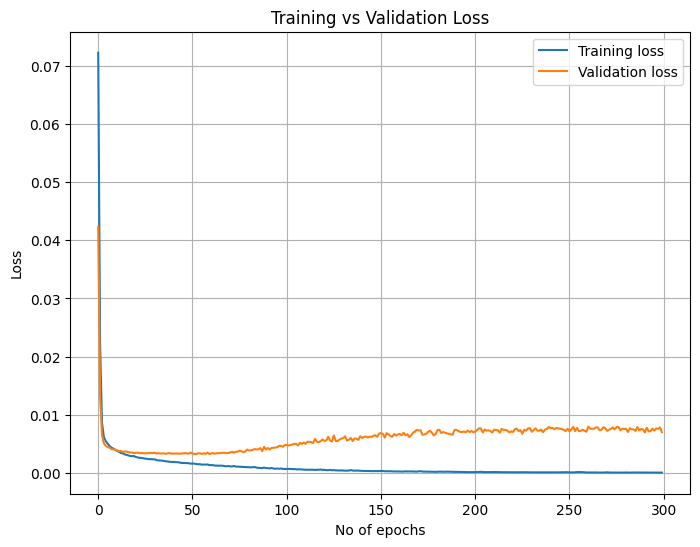

In [724]:
plt.figure(figsize=(8,6))

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

### OBSERVATIONS:

1. From the above graph, we can see that the Validation loss is much higher than the training loss.

### Step 13:  Make the Predictions

In [725]:
Y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [726]:
Y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [727]:
Y_test.values.shape

(80,)

In [728]:
Y_pred.flatten().shape

(80,)

In [729]:
df_new = pd.DataFrame({
    'Actual'    : Y_test.values             ,
    'Predicted' : Y_pred.flatten()
})

In [730]:
df_new

,Actual,Predicted
0,0.68,1.0
1,0.68,1.0
2,0.90,1.0
3,0.79,1.0
4,0.44,1.0
...,...,...
75,0.72,1.0
76,0.64,1.0
77,0.67,1.0
78,0.90,1.0


### Step 14: Check whether the student will get the admission or not

In [731]:
### Check whether the predicted values are greater than the threshold. If yes then 'Admitted' else' Not Admitted'

threshold = 0.75

df_new['Admission status'] = np.where(df_new['Predicted'] > threshold, 'Admitted','Not Admitted')


In [732]:
df_new

,Actual,Predicted,Admission status
0,0.68,1.0,Admitted
1,0.68,1.0,Admitted
2,0.90,1.0,Admitted
3,0.79,1.0,Admitted
4,0.44,1.0,Admitted
...,...,...,...
75,0.72,1.0,Admitted
76,0.64,1.0,Admitted
77,0.67,1.0,Admitted
78,0.90,1.0,Admitted
